In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from matplotlib.ticker import FormatStrFormatter


Bring in the eBid

In [2]:
ebid = pd.read_csv('../data/ebid.csv')

Show eBid data

In [3]:
ebid.head(2)

,Auction Title,Item_Type,Auction ID,Department,Budget_Dept,Close Date,Winning Bid,CC Fee,Fee Percent,Auction Fee Subtotal,...,Asset #,Inventory ID,Decal /Vehicle ID,VTR Number,Receipt Number,Cap,Expenses,Net Sales,Fund,Business Unit
0,Dell Laptop w/Bag,Computer,79519,ITS,IT,11/26/2013,78.51,1.81,0.23,18.05,...,NaN,74576,NaN,NaN,3603198592,3000,0.0,60.45,General Fund,0
1,21 Dell Optiplex 760 Computers,Computer,79530,ITS,IT,11/26/2013,451.51,10.38,0.23,103.84,...,NaN,"75160, 75144, 75143, 75165, 75149, 75167, 7514...",NaN,NaN,3604173051,3000,0.0,347.66,General Fund,0


Keep only necessary columns

In [4]:
ebid = ebid[['Auction Title','Item_Type','Auction ID','Budget_Dept','Close Date','Winning Bid','CC Fee','Fee Percent','Auction Fee Subtotal','Expenses','Net Sales']]
ebid['Close Date'] = pd.to_datetime(ebid['Close Date'])

In [5]:
ebid.head(2)

,Auction Title,Item_Type,Auction ID,Budget_Dept,Close Date,Winning Bid,CC Fee,Fee Percent,Auction Fee Subtotal,Expenses,Net Sales
0,Dell Laptop w/Bag,Computer,79519,IT,2013-11-26,78.51,1.81,0.23,18.05,0.0,60.45
1,21 Dell Optiplex 760 Computers,Computer,79530,IT,2013-11-26,451.51,10.38,0.23,103.84,0.0,347.66


In [6]:
ebid['Net Sales'].max()

7420000.0

Initiate a categorical breakdown by item category.

In [7]:
category_breakdown = ebid.groupby(["Item_Type"]).sum().sort_values("Net Sales", ascending=False)
category_breakdown.drop(['Auction ID'], axis=1, inplace=True)
category_breakdown

,Winning Bid,CC Fee,Auction Fee Subtotal,Expenses,Net Sales
Item_Type,,,,,
Land,30759652.30,0.00,922789.57,16969.0,30507407.65
Car,9547967.55,40741.35,2167049.49,95689.5,7521087.70
Computer,566740.24,8443.97,130349.42,0.0,436389.24
Electronics,514936.62,7179.70,118435.19,0.0,396501.51
Furniture,326693.55,5921.32,75137.60,0.0,251553.46
Clothing / Shoes,284226.03,3587.67,65371.92,75.0,220770.22
Appliance,237940.76,3756.14,54726.00,395.0,182819.38
Parts,235542.93,3024.81,54174.75,600.0,181521.04
Misc,196968.93,2554.31,45302.53,925.0,150741.19


Show the average net sales for all of eBid sales for all time.

In [8]:
eb_avgnetsales = round(ebid['Net Sales'].mean(), 2)
eb_avgwinningbid = round(ebid['Winning Bid'].mean(), 2)
print(f"The average winning bid was {eb_avgwinningbid} with the average net profit as {eb_avgnetsales}.")

The average winning bid was 1057.13 with the average net profit as 984.41.


Show number of total lots from eBid

In [9]:
ebid['Auction Title'].count()

41146

Show total net sales for all time

In [10]:
ebid['Net Sales'].sum()

40498457.370000005

Show the total amount of auction fees

In [11]:
ebid['Auction Fee Subtotal'].sum()

3819798.6

Overall info about eBid

In [12]:
ebid_desc = ebid.describe()
ebid_desc

,Auction ID,Winning Bid,CC Fee,Auction Fee Subtotal,Expenses,Net Sales
count,41146.000000,4.114600e+04,36949.000000,41146.000000,15888.000000,4.114000e+04
mean,101430.275701,1.057130e+03,2.333023,92.835236,7.484485,9.844059e+02
std,12315.753588,6.337177e+04,13.316911,1939.438334,133.305337,6.300828e+04
min,79519.000000,1.000000e+00,0.000000,0.230000,0.000000,-5.475600e+02
25%,90797.250000,1.100000e+01,0.120000,2.530000,0.000000,8.470000e+00
50%,101550.500000,3.200000e+01,0.510000,7.360000,0.000000,2.464000e+01
75%,112438.750000,7.600000e+01,1.220000,17.480000,0.000000,5.814000e+01
max,122942.000000,7.450000e+06,1122.400000,223500.000000,16269.000000,7.420000e+06


Bring in budget

In [13]:
budget = pd.read_csv('../data/Metro_Budget_to_Actual_Expenses__FY2010_-_Present_.csv')
budget

C:\Users\16153\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Department Description,Business Unit Description,Object Account Description,Dept Match,2010 Budgeted,2010 Actual,2011 Budgeted,2011 Actual,2012 Budgeted,2012 Actual,...,2019 Budgeted,2019 Actual,2020 Budgeted,2020 Actual,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Department Description.1,Dept Matchup
0,Administrative,ADM County Retire Match,Transfer Guaranteed Pension,Misc,3501900.0,3501900.00,3501900.0,3501900.00,3501900.0,3501900.00,...,3501900.0,3501900.00,3501900.0,3501900.00,NaN,NaN,NaN,NaN,Administrative,Misc
1,Administrative,ADM Cnty Teach Retire Match,Transfer Guaranteed Pension,Misc,6900400.0,6900400.00,6900400.0,6900400.00,6900400.0,6900400.00,...,6900400.0,6900400.00,6900400.0,6900400.00,NaN,NaN,NaN,NaN,Metropolitan Council,Leadership
2,Administrative,ADM Health Insurance Match,Employer Group Health,Misc,28309600.0,29163668.82,31105800.0,33822850.04,37124000.0,37237663.96,...,51244600.0,51147253.42,53391800.0,51619782.62,NaN,NaN,NaN,NaN,Metropolitan Clerk,Leadership
3,Administrative,ADM Health Insurance Match,Employer Dental Group,Misc,1823200.0,1831153.10,1926500.0,2012292.17,2172500.0,2205577.01,...,2986400.0,3045002.14,3063700.0,3128416.49,NaN,NaN,NaN,NaN,Mayor's Office,Leadership
4,Administrative,ADM Death Benefit Payments,Transfer Operational,Misc,200000.0,200000.00,200000.0,200000.00,200000.0,200000.00,...,200000.0,200000.00,200000.0,200000.00,NaN,NaN,NaN,NaN,Election Commission,Leadership
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30009,MNPS,MNPS Project 98,Other Special Pay,Education,188500.0,189991.22,185000.0,82822.03,65000.0,71986.41,...,113000.0,90881.36,113000.0,62071.90,NaN,NaN,NaN,NaN,NaN,NaN
30010,MNPS,MNPS Project 98,Security Services,Education,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN
30011,MNPS,MNPS Project 98,Janitorial Srvc,Education,0.0,0.00,0.0,18748.50,10000.0,48625.75,...,75000.0,104935.78,129400.0,158672.50,NaN,NaN,NaN,NaN,NaN,NaN
30012,MNPS,MNPS Project 98,Bus Service,Education,5000.0,0.00,5000.0,0.00,10000.0,0.00,...,0.0,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN


Describe basics about the budget per year

In [14]:
budget.describe()

,2010 Budgeted,2010 Actual,2011 Budgeted,2011 Actual,2012 Budgeted,2012 Actual,2013 Budgeted,2013 Actual,2014 Budgeted,2014 Actual,...,2018 Budgeted,2018 Actual,2019 Budgeted,2019 Actual,2020 Budgeted,2020 Actual,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
count,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,...,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,0.0,0.0,0.0,0.0
mean,5.331805e+04,5.947083e+04,5.285780e+04,6.343166e+04,5.526367e+04,6.767961e+04,5.849558e+04,7.182243e+04,6.137324e+04,6.030253e+04,...,7.625510e+04,7.408692e+04,7.656846e+04,7.520500e+04,8.045041e+04,7.675342e+04,NaN,NaN,NaN,NaN
std,7.511063e+05,1.068739e+06,6.577743e+05,1.410321e+06,6.864122e+05,1.713563e+06,7.418520e+05,1.812616e+06,8.309166e+05,8.252874e+05,...,1.242751e+06,1.205115e+06,1.322833e+06,1.296399e+06,1.449095e+06,1.320019e+06,NaN,NaN,NaN,NaN
min,-4.627935e+05,-5.957021e+06,-7.000000e+05,-2.974007e+06,-1.004000e+05,-6.944092e+05,-4.172000e+05,-2.527669e+05,-1.043800e+06,-4.820481e+04,...,-1.478538e+07,-6.664450e+05,-1.834056e+07,-7.086459e+05,-1.312614e+07,-1.199331e+05,NaN,NaN,NaN,NaN
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
75%,1.100000e+03,2.114178e+03,1.800000e+03,2.803505e+03,1.900000e+03,2.785260e+03,1.500000e+03,2.500000e+03,2.000000e+03,2.777342e+03,...,2.400000e+03,3.312325e+03,2.500000e+03,3.477265e+03,2.300000e+03,3.605715e+03,NaN,NaN,NaN,NaN
max,7.587860e+07,1.036613e+08,4.581910e+07,1.647911e+08,4.583350e+07,2.484499e+08,4.989620e+07,2.350336e+08,5.211470e+07,6.039919e+07,...,1.123892e+08,1.133472e+08,1.305525e+08,1.295796e+08,1.379929e+08,1.344181e+08,NaN,NaN,NaN,NaN


In [15]:
budget['2013 Actual'].sum()

2155678536.68

In [16]:
ebid_2013 = ebid[ebid['Close Date'].dt.year == 2013]
ebid_2014 = ebid[ebid['Close Date'].dt.year == 2014]
ebid_2015 = ebid[ebid['Close Date'].dt.year == 2015]
ebid_2016 = ebid[ebid['Close Date'].dt.year == 2016]
ebid_2017 = ebid[ebid['Close Date'].dt.year == 2017]
ebid_2018 = ebid[ebid['Close Date'].dt.year == 2018]
ebid_2019 = ebid[ebid['Close Date'].dt.year == 2019]
ebid_2020 = ebid[ebid['Close Date'].dt.year == 2020]
ebid_2013

,Auction Title,Item_Type,Auction ID,Budget_Dept,Close Date,Winning Bid,CC Fee,Fee Percent,Auction Fee Subtotal,Expenses,Net Sales
0,Dell Laptop w/Bag,Computer,79519,IT,2013-11-26,78.51,1.81,0.23,18.05,0.0,60.45
1,21 Dell Optiplex 760 Computers,Computer,79530,IT,2013-11-26,451.51,10.38,0.23,103.84,0.0,347.66
2,"4 Asanti 24"" Chrome Rims",Parts,79539,Police,2013-11-27,2000.00,0.00,0.23,460.00,0.0,1540.00
3,10Kt Yellow Gold Rope Chain,Clothing / Shoes,79577,Police,2013-12-04,815.00,0.00,0.23,187.45,0.0,627.55
4,Men's Diamond Watch,Clothing / Shoes,79589,Police,2013-12-11,460.00,10.58,0.23,105.80,0.0,354.20
5,Coach Purse,Accessories,79618,Police,2013-12-02,29.00,0.67,0.23,6.67,0.0,22.33
6,1994 Pontiac Firebird,Car,79630,Police,2013-12-05,568.00,0.00,0.23,130.64,105.0,332.36
7,Wheel Chair Lift,Furniture,79662,Education,2013-12-04,158.99,3.66,0.23,36.56,0.0,122.42
8,1 Pallet of Assorted Tires,Parts,79667,Education,2013-12-04,106.00,2.44,0.23,24.38,0.0,81.62
9,3 Catalytic Converters,Parts,79706,Transportation,2013-12-05,125.01,0.00,0.23,28.75,0.0,96.25


In [17]:
year_list = [x for x in range(2013,2021)]
ebid_rev_dict = {2013: ebid_2013, 2014: ebid_2014, 2015: ebid_2015, 2016: ebid_2016, 2017: ebid_2017, 2018: ebid_2018, 2019: ebid_2019, 2020: ebid_2020}
budget_dict = {2013: budget[['2013 Budgeted']], 2014: budget[['2014 Budgeted']], 2015: budget[['2015 Budgeted']], 2016: budget[['2016 Budgeted']], 2017: budget[['2017 Budgeted']], 2018: budget[['2018 Budgeted']], 2019: budget[['2019 Budgeted']], 2020: budget[['2020 Budgeted']]}
budget_amt_list = []
ebid_rev_list = []

for year in year_list:
    ebid_df = ebid_rev_dict[year]
    ebid_rev = ebid_df['Net Sales'].sum()
    budget_df = budget_dict[year]
    budget = budget_df.sum()
    print(f"The {year} budget was {budget} and the ebid total revenue was {ebid_rev}.")
    budget_amt_list.append(budget)
    ebid_rev_list.append(ebid_rev)

The 2013 budget was 2013 Budgeted    1.755686e+09
dtype: float64 and the ebid total revenue was 5320.510000000001.
The 2014 budget was 2014 Budgeted    1.842056e+09
dtype: float64 and the ebid total revenue was 9953250.610000003.
The 2015 budget was 2015 Budgeted    1.947166e+09
dtype: float64 and the ebid total revenue was 1831304.37.
The 2016 budget was 2016 Budgeted    2012819700
dtype: int64 and the ebid total revenue was 7075993.02.
The 2017 budget was 2017 Budgeted    2.145225e+09
dtype: float64 and the ebid total revenue was 1478426.65.
The 2018 budget was 2018 Budgeted    2.288721e+09
dtype: float64 and the ebid total revenue was 2025627.05.
The 2019 budget was 2019 Budgeted    2.298126e+09
dtype: float64 and the ebid total revenue was 17725182.04.
The 2020 budget was 2020 Budgeted    2.414639e+09
dtype: float64 and the ebid total revenue was 403353.12.


In [18]:
budget_dict[2013]

,2013 Budgeted
0,3501900.0
1,6900400.0
2,41155700.0
3,2445000.0
4,200000.0
...,...
30009,65000.0
30010,0.0
30011,10000.0
30012,10000.0


In [19]:
ebid_budget_df = pd.DataFrame(list(zip(year_list,budget_amt_list,ebid_rev_list)), columns=['Year','Budget','eBid Revenue'])
# ebid_budget_df.set_index('Year')

In [20]:
ebid_budget_df['Percent Total Budget'] = (ebid_budget_df['eBid Revenue'] / ebid_budget_df['Budget']) * 100
ebid_budget_df  #.set_index('Year')

,Year,Budget,eBid Revenue,Percent Total Budget
0,2013,2013 Budgeted 1.755686e+09 dtype: float64,5320.51,2013 Budgeted 0.000303 dtype: float64
1,2014,2014 Budgeted 1.842056e+09 dtype: float64,9953250.61,2014 Budgeted 0.540334 dtype: float64
2,2015,2015 Budgeted 1.947166e+09 dtype: float64,1831304.37,2015 Budgeted 0.09405 dtype: float64
3,2016,2016 Budgeted 2012819700 dtype: int64,7075993.02,2016 Budgeted 0.351546 dtype: float64
4,2017,2017 Budgeted 2.145225e+09 dtype: float64,1478426.65,2017 Budgeted 0.068917 dtype: float64
5,2018,2018 Budgeted 2.288721e+09 dtype: float64,2025627.05,2018 Budgeted 0.088505 dtype: float64
6,2019,2019 Budgeted 2.298126e+09 dtype: float64,17725182.04,2019 Budgeted 0.771289 dtype: float64
7,2020,2020 Budgeted 2.414639e+09 dtype: float64,403353.12,2020 Budgeted 0.016704 dtype: float64


Show percentage of total budget that eBid presents each year.

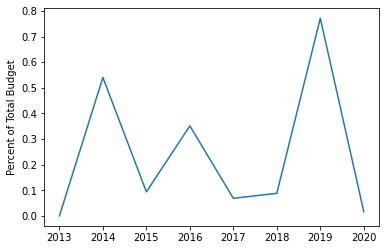

In [21]:
plt.plot(ebid_budget_df['Year'],ebid_budget_df['Percent Total Budget'])
plt.ylabel("Percent of Total Budget")
plt.show()

Show the eBid revenue by year

<ipython-input-22-c7cf9e22c2e1>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


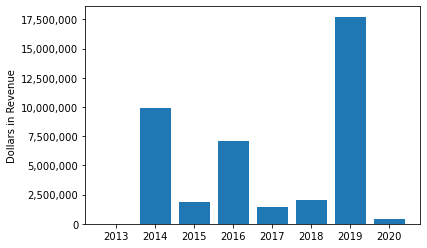

In [22]:
# plt.bar(ebid_budget_df['Year'],ebid_budget_df['eBid Revenue'])
fig, ax = plt.subplots()
ax.get_yaxis().set_major_formatter(FormatStrFormatter('$%.0f'))

plt.bar(ebid_budget_df['Year'],ebid_budget_df['eBid Revenue'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.ylabel("Dollars in Revenue")
plt.show()

Break eBid down by budget category

In [23]:
budget_cat_breakdown = ebid.groupby(["Budget_Dept"]).sum().sort_values("Net Sales", ascending=False)
budget_cat_breakdown.drop(['CC Fee', 'Expenses', "Auction Fee Subtotal", 'Auction ID'], axis=1, inplace=True)
budget_cat_breakdown

,Winning Bid,Net Sales
Budget_Dept,,
Community,26472915.81,26172610.58
Education,6479282.99,6039937.11
Transportation,5770719.68,4645850.94
Police,3766145.31,2864192.10
IT,488908.99,376459.13
Misc,150673.17,116018.66
Utilities,119005.15,91634.21
Court,92344.23,71104.99
Health,75110.40,57834.93


Break down budget by category

In [24]:
# budget_breakdown = budget.groupby(["Dept Match"]).sum().sort_values("Net Sales", ascending=False)
# # budget_breakdown.drop(['CC Fee', 'Expenses', "Auction Fee Subtotal", 'Auction ID'], axis=1, inplace=True)
# budget_breakdown

Show a breakdown of annual categorical budget comprisal.

In [25]:
budget_amt_list = []
ebid_rev_list = []
annual_cat_breakdown_dict = {}

In [26]:
cat_list = []
for cat in ebid['Budget_Dept'].unique():
    cat_list.append(cat)
cat_list

['IT',
 'Police',
 'Education',
 'Transportation',
 'Community',
 'Court',
 'Misc',
 'Utilities',
 'Finance',
 'Emergency',
 'Health',
 'Leadership',
 'Records']

In [27]:
ebid_rev_dict[2013]

,Auction Title,Item_Type,Auction ID,Budget_Dept,Close Date,Winning Bid,CC Fee,Fee Percent,Auction Fee Subtotal,Expenses,Net Sales
0,Dell Laptop w/Bag,Computer,79519,IT,2013-11-26,78.51,1.81,0.23,18.05,0.0,60.45
1,21 Dell Optiplex 760 Computers,Computer,79530,IT,2013-11-26,451.51,10.38,0.23,103.84,0.0,347.66
2,"4 Asanti 24"" Chrome Rims",Parts,79539,Police,2013-11-27,2000.00,0.00,0.23,460.00,0.0,1540.00
3,10Kt Yellow Gold Rope Chain,Clothing / Shoes,79577,Police,2013-12-04,815.00,0.00,0.23,187.45,0.0,627.55
4,Men's Diamond Watch,Clothing / Shoes,79589,Police,2013-12-11,460.00,10.58,0.23,105.80,0.0,354.20
5,Coach Purse,Accessories,79618,Police,2013-12-02,29.00,0.67,0.23,6.67,0.0,22.33
6,1994 Pontiac Firebird,Car,79630,Police,2013-12-05,568.00,0.00,0.23,130.64,105.0,332.36
7,Wheel Chair Lift,Furniture,79662,Education,2013-12-04,158.99,3.66,0.23,36.56,0.0,122.42
8,1 Pallet of Assorted Tires,Parts,79667,Education,2013-12-04,106.00,2.44,0.23,24.38,0.0,81.62
9,3 Catalytic Converters,Parts,79706,Transportation,2013-12-05,125.01,0.00,0.23,28.75,0.0,96.25


In [28]:


### Need this thing broken down by category as well. 
### Just to note for myself, I will probably have to indent
### here and add that as another for loop
### with unique values from Budget_Dept.
for cat in cat_list:
    
    for year in year_list:
        ebid_df = ebid_rev_dict[year]
        ebid_rev = ebid_df['Net Sales'].sum()
        budget_df = budget_dict[year]
        budget_df = ebid_df.groupby(["Budget_Dept"]).sum().sort_values("Budget_Dept", ascending=False)
#         budget = budget_df.loc[str(cat)]
        budget_cat_breakdown = ebid_df.groupby(["Budget_Dept"]).sum().sort_values("Net Sales", ascending=False)
#         print(f"The {year} budget was {budget} and the ebid total revenue was {ebid_rev}. The categorical budget breakdown is below.")
        budget_amt_list.append(budget)
        ebid_rev_list.append(ebid_rev)

        annual_cat_breakdown_dict[year] = budget_cat_breakdown

In [29]:
annual_cat_breakdown_dict[year]

,Auction ID,Winning Bid,CC Fee,Auction Fee Subtotal,Expenses,Net Sales
Budget_Dept,,,,,,
Transportation,12908618,304673.31,1295.05,70074.85,0.0,251804.11
Police,54529985,68560.82,631.11,15769.08,2030.0,50761.97
Education,26726824,59132.05,288.28,13600.38,0.0,45531.76
IT,75309849,32166.62,733.35,7398.59,0.0,24768.28
Community,38218460,16352.10,340.69,3760.95,0.0,12591.24
Court,30893805,12397.73,257.58,2851.43,0.0,9546.36
Emergency,11442563,3879.49,88.93,892.28,0.0,2987.24
Misc,11057123,3165.89,64.78,728.16,0.0,2437.74
Leadership,8360547,2227.79,51.24,512.44,0.0,1715.44


In [30]:
ebid_rev_cat_year_list = []
annual_cat_breakdown_dict[2013]
for df in year_list:
    df = annual_cat_breakdown_dict[year]
#     df.drop(['Winning Bid','CC Fee', 'Auction Fee Subtotal', 'Expenses'], axis=1, inplace=True)
    ebid_rev_cat_year_list.append(df)

ebid_rev_cat_year_list

[                Auction ID  Winning Bid   CC Fee  Auction Fee Subtotal  \
 Budget_Dept                                                              
 Transportation    12908618    304673.31  1295.05              70074.85   
 Police            54529985     68560.82   631.11              15769.08   
 Education         26726824     59132.05   288.28              13600.38   
 IT                75309849     32166.62   733.35               7398.59   
 Community         38218460     16352.10   340.69               3760.95   
 Court             30893805     12397.73   257.58               2851.43   
 Emergency         11442563      3879.49    88.93                892.28   
 Misc              11057123      3165.89    64.78                728.16   
 Leadership         8360547      2227.79    51.24                512.44   
 Health             4372442       802.39    16.89                184.60   
 Utilities          1090744       296.59     6.82                 68.22   
 Records            24248

In [31]:
ebid_budget_df = pd.DataFrame(list(zip(cat_list,budget_amt_list,ebid_rev_list)), columns=['Category','Budget','eBid Revenue'])
ebid_budget_df

,Category,Budget,eBid Revenue
0,IT,2020 Budgeted 2.414639e+09 dtype: float64,5320.51
1,Police,2020 Budgeted 2.414639e+09 dtype: float64,9953250.61
2,Education,2020 Budgeted 2.414639e+09 dtype: float64,1831304.37
3,Transportation,2020 Budgeted 2.414639e+09 dtype: float64,7075993.02
4,Community,2020 Budgeted 2.414639e+09 dtype: float64,1478426.65
5,Court,2020 Budgeted 2.414639e+09 dtype: float64,2025627.05
6,Misc,2020 Budgeted 2.414639e+09 dtype: float64,17725182.04
7,Utilities,2020 Budgeted 2.414639e+09 dtype: float64,403353.12
8,Finance,2020 Budgeted 2.414639e+09 dtype: float64,5320.51
9,Emergency,2020 Budgeted 2.414639e+09 dtype: float64,9953250.61


In [33]:

for year in year_list:
    global annual_cat_breakdown_dict
    df = annual_cat_breakdown_dict[year]
    
    ### I don't know if this needs to go here or further down yet
    ### I at least see that I need to replace the ebid_rev_list with something else...
    ### I need to get Budget dollars summarized by categories per year
    ### I need to sleep.
    ebid_budget_df = pd.DataFrame(list(zip(cat_list,budget_amt_list,ebid_rev_list)), columns=['Category','Budget','eBid Revenue'])
    ######### budget_cat_breakdown = ebid.groupby(["Budget_Dept"]).sum().sort_values("Net Sales", ascending=False)
    cat_breakdown = ebid_budget_df.groupby(["Budget_Dept"]).sum().sort_values("Net Sales", ascending=False)
    fig, ax = plt.subplots()
    ax.get_yaxis().set_major_formatter(FormatStrFormatter('$%.0f'))
    plt.bar(cat_breakdown['Budget_Dept'],df['eBid Revenue']) 
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    plt.label(str(year) + " Categorical Breakdown")
    plt.ylabel("Dollars in Revenue")
    plt.show()

KeyError: 'Budget_Dept'

Create plots for count of item type and then revenue per item type

In [34]:
item_type_cts = pd.DataFrame(ebid['Item_Type'].value_counts())
item_type_cts.reset_index(level=0, inplace=True)
item_type_cts

,index,Item_Type
0,Furniture,9831
1,Computer,7393
2,Electronics,4089
3,Car,2971
4,Clothing / Shoes,2769
5,Misc,1579
6,Monitor,1564
7,Appliance,1532
8,Parts,1489
9,Tools,1416


<AxesSubplot:title={'center':'Count of Item Type'}>

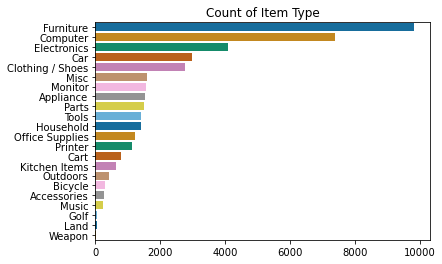

In [35]:
# sns.set_theme(style="darkgrid")

ax = sns.barplot(y="index", x='Item_Type', palette='colorblind', data=item_type_cts)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
# plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["figure.figsize"] = (8, 4)
plt.xlabel("")
plt.title("Count of Item Type")
plt.ylabel("")
ax

In [36]:
item_type_rev = ebid.groupby(["Item_Type"]).sum().sort_values("Net Sales", ascending=False)
item_type_rev.drop(['CC Fee', 'Expenses', "Auction Fee Subtotal", 'Auction ID','Winning Bid'], axis=1, inplace=True)
item_type_rev.reset_index(level=0, inplace=True)
item_type_rev

,Item_Type,Net Sales
0,Land,30507407.65
1,Car,7521087.70
2,Computer,436389.24
3,Electronics,396501.51
4,Furniture,251553.46
5,Clothing / Shoes,220770.22
6,Appliance,182819.38
7,Parts,181521.04
8,Misc,150741.19
9,Tools,146330.72


<AxesSubplot:title={'center':'Revenue of Item Type'}, ylabel='Ten Millions'>

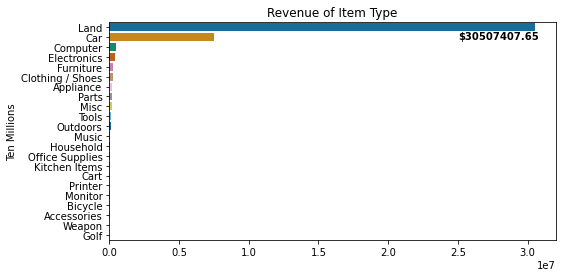

In [37]:
ax = sns.barplot(y="Item_Type", x='Net Sales', palette='colorblind', data=item_type_rev)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
# plt.rcParams["xtick.labelsize"] = 14
# plt.rcParams["figure.figsize"] = (8, 4)
plt.xlabel("")
plt.title("Revenue of Item Type")
plt.ylabel("Ten Millions")
max_ct_item_type_rev = "$"+str(max(item_type_rev['Net Sales']))
plt.text(25000000,1+0.2, max_ct_item_type_rev, horizontalalignment='left', size='medium', color='black', weight='semibold')

ax

<AxesSubplot:title={'center':'Revenue of Item Type (without Land)'}, ylabel='Millions'>

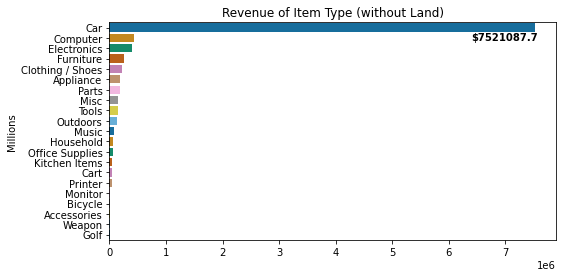

In [38]:
item_type_rev_no_land = item_type_rev[item_type_rev['Item_Type']!='Land']
ax = sns.barplot(y="Item_Type", x='Net Sales', palette='colorblind', data=item_type_rev_no_land)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
# plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["figure.figsize"] = (8, 4)
plt.xlabel("")
plt.title("Revenue of Item Type (without Land)")
plt.ylabel("Millions")
max_ct_item_type_rev_no_land = "$"+str(round(max(item_type_rev_no_land['Net Sales']),2))
plt.text(6400000, 1+0.2, max_ct_item_type_rev_no_land, horizontalalignment='left', size='medium', color='black', weight='semibold')

ax

<AxesSubplot:title={'center':'Revenue of Item Type (without Land or Car)'}, xlabel='Hundred Thousands'>

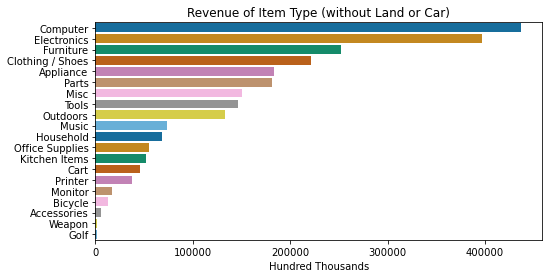

In [39]:
# item_type_rev_no_land_or_car

item_type_rev_no_land_or_car = item_type_rev_no_land[item_type_rev_no_land['Item_Type']!='Car']
ax = sns.barplot(y="Item_Type", x='Net Sales', palette='colorblind', data=item_type_rev_no_land_or_car)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
# plt.rcParams["xtick.labelsize"] = 14
# plt.rcParams["figure.figsize"] = (8, 4)
plt.ylabel("")
plt.title("Revenue of Item Type (without Land or Car)")
plt.xlabel("Hundred Thousands")
# max_ct_item_type_rev_no_land = "$"+str(round(max(item_type_rev_no_land_or_car['Net Sales']),2))
# plt.text(0+0.2, 400000, max_ct_item_type_rev_no_land, horizontalalignment='left', size='medium', color='black', weight='semibold')

ax

<AxesSubplot:title={'center':'Revenue of Interesting items'}>

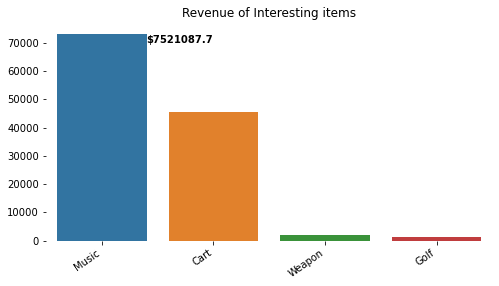

In [40]:
interesting_item_types = item_type_rev[item_type_rev['Item_Type'].isin(['Music','Golf','Weapon','Cart'])]
ax = sns.barplot(x="Item_Type", y='Net Sales', data=interesting_item_types)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["figure.figsize"] = (8, 4)
plt.xlabel("")
sns.despine(left=True, bottom=True)
plt.title("Revenue of Interesting items")
plt.ylabel("")
max_ct_item_interesting = "$"+str(round(max(interesting_item_types['Net Sales']),2))
plt.text(0+0.4, 70000, max_ct_item_type_rev_no_land, horizontalalignment='left', size='medium', color='black', weight='semibold')

ax

In [41]:
music_df = ebid[ebid['Item_Type']=='Music']
music_df.drop(["Auction ID","Winning Bid", "Auction Fee Subtotal",'Expenses',"CC Fee"], axis=1, inplace=True)
music_df.describe()

C:\Users\16153\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Net Sales
count,240.000000
mean,305.412333
std,3346.250575
min,0.770000
25%,16.170000
50%,30.915000
75%,77.192500
max,51815.000000


In [42]:
music_dict ={'largest sale': music_df['Net Sales'].max(),'smallest sale': music_df['Net Sales'].min(), 'average profit': music_df['Net Sales'].mean(), 'median profit': music_df['Net Sales'].median()}#, 'most frequent amount': music_df['Net Sales'].mode()}
print()
print()
music_dict['item count'] = len(music_df)
for key in music_dict:
    print(f"Music's {key}: {music_dict[key]}")
print()    
print()



Music's largest sale: 51815.0
Music's smallest sale: 0.77
Music's average profit: 305.41233333333366
Music's median profit: 30.915
Music's item count: 240




Show a scatterplot for Land revenues

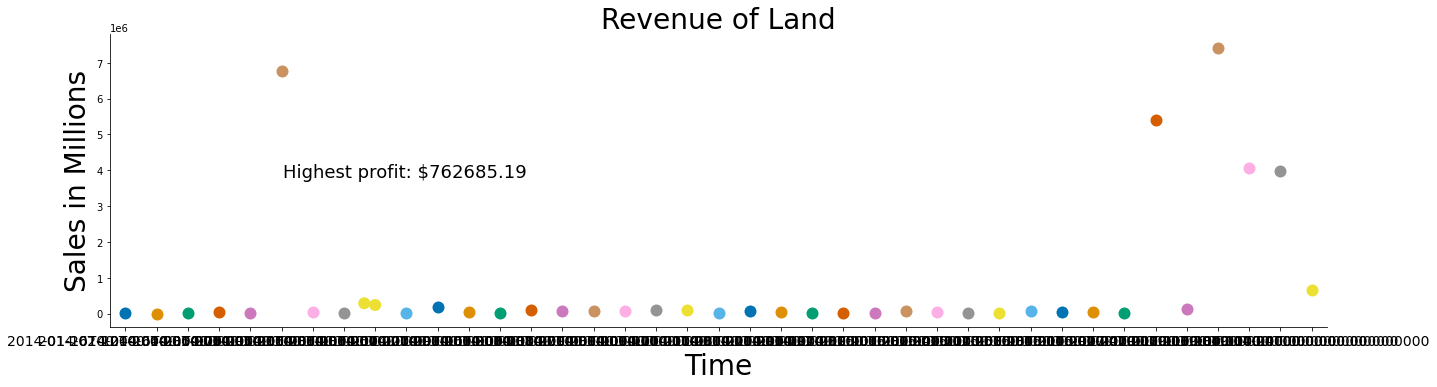

In [43]:
land_df = ebid[ebid['Item_Type']=='Land']    
ax = sns.catplot(x="Close Date", y='Net Sales', s=12, aspect=4, kind='swarm', palette='colorblind', data=land_df)
plt.rcParams["xtick.labelsize"] = 0
plt.rcParams["figure.figsize"] = (2, 4)
plt.xlabel("Time", fontsize=28)
plt.title("Revenue of Land", fontsize=28)
plt.ylabel("Sales in Millions",fontsize=28)
land_mean = "Highest profit: $"+str(round(land_df['Net Sales'].mean(),2))
plt.text(5+0.05, land_df['Net Sales'].mean()*5, land_mean, horizontalalignment='left', fontsize=18, color='black')

ax